# Links
https://matplotlib.org/stable/tutorials/introductory/quick_start.html#sphx-glr-tutorials-introductory-quick-start-py
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

In [360]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import pandas as pd # csv
import seaborn
from scipy import interpolate
from scipy.optimize import curve_fit
from mplcursors import cursor

In [361]:
%matplotlib inline
# %matplotlib notebook
# %matplotlib qt

In [362]:
def userPltArgs():
    plotDecorations = \
            {
             'linestyle'       : '-', 
             'color'           : 'royalblue', # line color
             'linewidth'       : 1,
             'marker'          : 'o', # marker shape
             'markerfacecolor' : 'midnightblue', # marker fill color: can be None (default color) or 'None' (alpha color)
             'markeredgecolor' : 'None', # marker edge color
             'markersize'      : 2
            }
    return plotDecorations

In [367]:
def generateLine(k=1, n=100, x0=0, y0=8, m=0, sigma=5):
    x = np.linspace(1,n,n)
    noise = m + np.random.randn(n)*sigma
    y = k*(x - x0) + y0 + noise
    return x, y

def smooth(x, y, step=None):
    if step is None:
        step = len(x) * 10
    bspline = interpolate.make_interp_spline(x, y)
    xSmooth = np.linspace(x.min(), x.max(), step)
    ySmooth = bspline(xSmooth)
    return xSmooth, ySmooth

def linearFit(x, y):
    f = lambda x, k, b: k * x + b
    beta_opt, beta_cov = curve_fit(f, x, y)
    return x, beta_opt[0]*x+beta_opt[1], beta_opt, beta_cov
    

In [364]:
def createPlot(x, y, xerr=None, yerr=None, title='Визуализация $f(x)$', xName='x', yName='y',label='unknown data', plotDecorations=None):
    if plotDecorations is None:
        plotDecorations = dict(
             linestyle       = '-', 
             color           = 'royalblue', # line color
             linewidth       = 1,
             marker          = 'o', # marker shape
             markerfacecolor = 'midnightblue', # marker fill color: can be None (default color) or 'None' (alpha color)
             markeredgecolor = 'None', # marker edge color
             markersize      = 2
        )
    
    
    plt.figure(figsize=[16, 8], dpi=120)
    plt.title(title)
    plt.ylabel(xName)
    plt.xlabel(yName)

    plt.plot(x, y, label=label, **plotDecorations)
    plt.errorbar(x, y, xerr=xerr, yerr=yerr, capsize=plotDecorations['markersize'], ecolor='firebrick', linestyle=':', linewidth=plotDecorations['linewidth']*0.5, barsabove=True)


    data = smooth(x, y)
    plt.plot(*data, color='gray', linestyle='--', linewidth=plotDecorations['linewidth']*0.8, marker='None')


    xf, yf, _, _ = linearFit(x, y)
    plt.plot(xf, yf, color='red', linestyle=':', linewidth=plotDecorations['linewidth']*0.8, marker='None')
    
    gap = lambda a, ticks=1: abs(a.max() - a.min()) / len(a) * ticks
    plt.xlim([0, x.max() + gap(x, 2)])
    plt.ylim([0, y.max() + gap(y, 5)])
    plt.xticks(np.arange(0, x.max() + gap(x, 2), 2))
    plt.yticks(np.arange(0, y.max() + gap(y, 5), 5))
    plt.grid()
    plt.minorticks_on()
    cursor(hover=True)
    plt.legend(loc='best')
    plt.show()

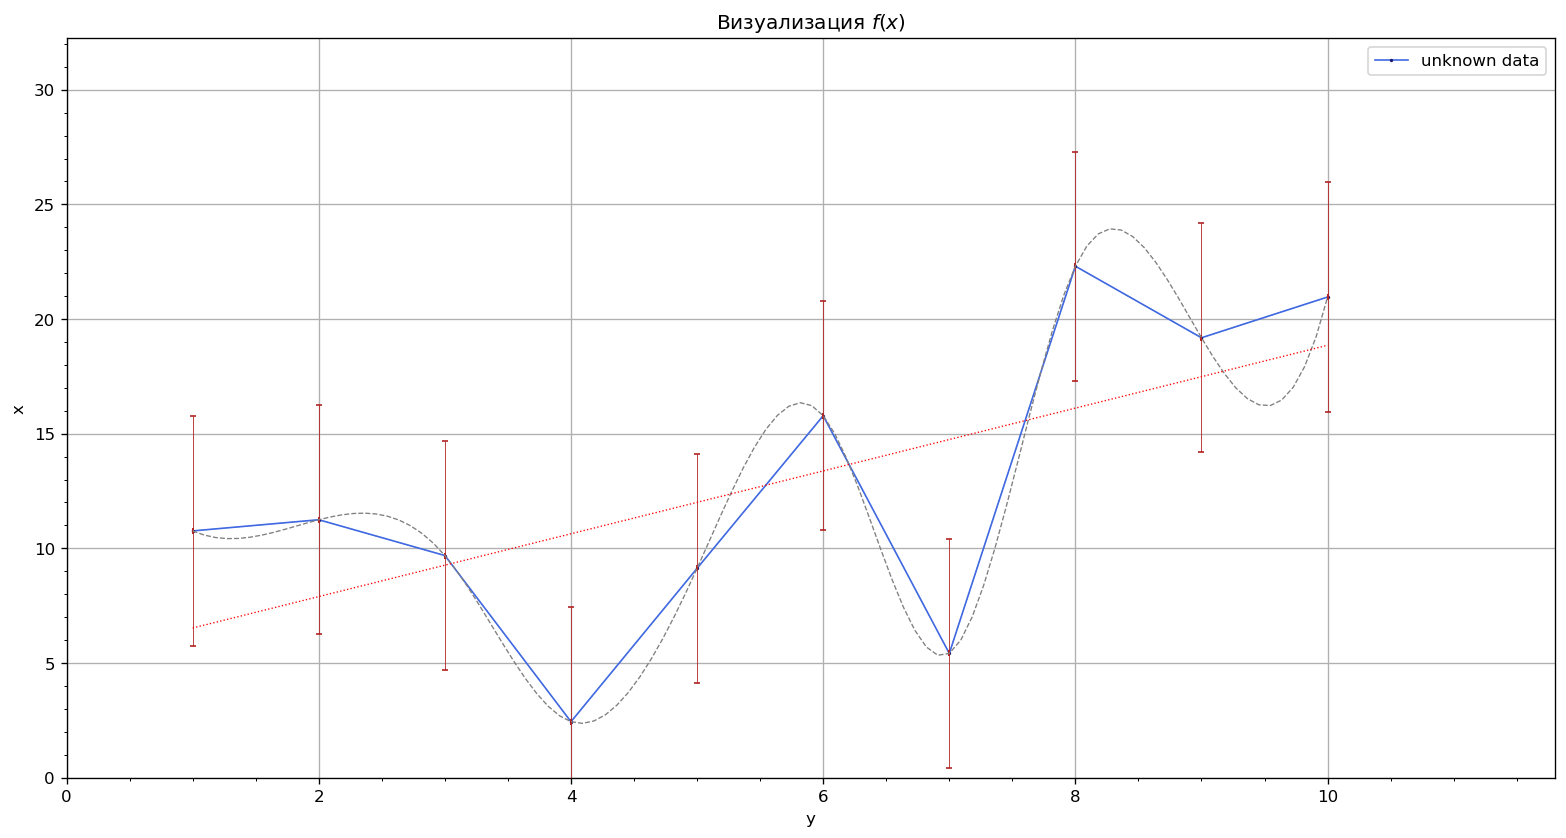

In [368]:
data = generateLine(n=10)
createPlot(*data, xerr=0, yerr=5)

In [186]:
arr = np.array([[1,2,3]])
np.shape([[1, 2, 3]])

def proxy(**kargs):
    print(kargs)
    
a = dict(x=1, y=2)
print(a)

{'x': 1, 'y': 2}


In [257]:
%%cmd
echo hello

Microsoft Windows [Version 10.0.22621.1702]
(c) Microsoft Corporation. All rights reserved.

C:\Users\alexa\Downloads\Python>echo hello
hello

C:\Users\alexa\Downloads\Python>

In [369]:
import pandas as pd

In [376]:
mydict = {
  "key1":["val1_1", "val1_2"],
  "key2":["val2_1", "val2_2"],
  "key3":["val3_1", "val3_2"],
  "key4":["val4_1", 6],
}

colums = [1, 2, 3, 4]

pd.DataFrame(mydict, colums)

ValueError: Length of values (2) does not match length of index (4)